# CASE STUDY – CREDIT CARD SEGMENTATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

C:\Users\Ayush\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# reading data into dataframe

credit= pd.read_csv('CC_GENERAL.csv')


In [3]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
credit.shape

(8950, 18)

In [7]:
print(credit['CREDIT_LIMIT'].describe())

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64


In [8]:
# Intital descriptive analysis of data.
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
credit[credit['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


---

# a) Missing Value Treatment
       - Since there are missing values in the data so we are imputing them with median.

---

In [10]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [11]:
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)

credit['CREDIT_LIMIT'].count()


credit['MINIMUM_PAYMENTS'].median()
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)

In [12]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

----

# Deriving New KPI

---

##  1. Monthly_avg_purchase

In [13]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [14]:
print(credit['Monthly_avg_purchase'].head(),'\n ')
print(credit['TENURE'].head(),'\n')
print(credit['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
 
0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 

0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


##  2. Monthly_cash_advance

In [15]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']
credit.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance
5158,C15303,1451.993504,1.0,0.00,0.00,0.00,1739.998495,0.00,0.000000,0.00,0.250000,4,0,2000.0,251.384712,228.826381,0.000000,8,0.000000,217.499812
13,C10014,921.693369,1.0,2137.93,419.96,1717.97,0.000000,0.75,0.166667,0.75,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,178.160833,0.000000
4941,C15080,0.000000,0.0,0.00,0.00,0.00,253.887233,0.00,0.000000,0.00,0.111111,1,0,500.0,2437.932505,312.343947,0.000000,9,0.000000,28.209693
4717,C14846,6749.994904,1.0,0.00,0.00,0.00,4561.826799,0.00,0.000000,0.00,0.416667,10,0,11500.0,4930.710131,4974.373221,0.000000,12,0.000000,380.152233
7735,C17944,18.180646,1.0,220.06,0.00,220.06,0.000000,1.00,0.000000,1.00,0.000000,0,12,1000.0,217.276088,140.596138,0.700000,12,18.338333,0.000000


In [16]:
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

##  3. Purchase_type 
- To find what type of purchases customers are making on credit card

In [17]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [18]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [19]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [20]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [21]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

### I found out that there are 4 types of purchase behaviour in the data set. So deriving a categorical variable based on the behaviour

In [22]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [23]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [24]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [25]:
credit[credit['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type


---
## 4. Limit_usage (shows credit-score ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [26]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [27]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [28]:
credit['PAYMENTS'].isnull().any()
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [29]:
credit['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [30]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [31]:
credit.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
purchase_type                        object
limit_usage                         float64
payment_minpay                  

# b) Extreme value Treatment
- Since there are variables having extreme values, I am doing log-transformation on the dataset to remove outlier effect 

In [32]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075


In [33]:
# log tranformation
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [34]:
cr_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360


In [35]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [36]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [37]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [38]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

---

# Insights from new KPIs

---

In [39]:
# Average payment_minpayment ratio for each purchse type.
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
x

purchase_type
both_oneoff_installment     7.236982
installment                13.259004
none                       10.087451
one_off                     5.571082
dtype: float64

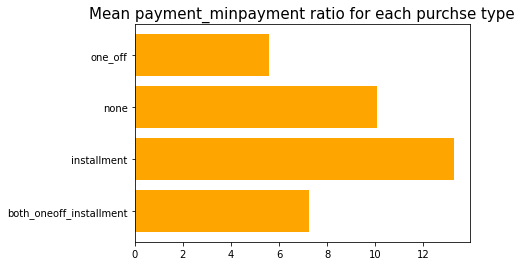

In [40]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)),width=x.values,color='orange')
ax.set(yticks= np.arange(len(x)),yticklabels=x.index)
plt.title('Mean payment_minpayment ratio for each purchse type',fontsize=15)
plt.show()

In [41]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


## Inference 1. customers with installment purchases are paying dues .

---



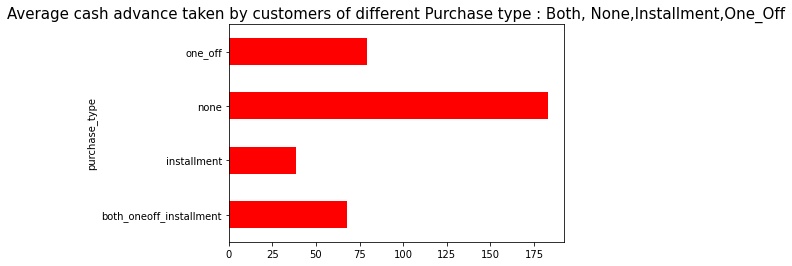

In [42]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh(color='r')

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off',fontsize=15)
plt.show()

## Inference 2. Customers who don't do either one-off or installment purchases take more cash on advance

---

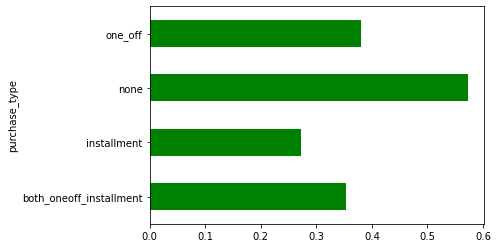

In [43]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh(color='g')

## Inference 3. Customers with installment purchases have good credit score

---

In [44]:
# Original dataset with categorical column converted to number type.

cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

******
# c) Preparing for Machine learning
******

In [45]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

,both_oneoff_installment,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [46]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)
cr_dummy

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,installment,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.693147,0.000000,5.677165,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.902377,0.000000,0.028095,2.036042,installment,0,1,0,0
8946,0.693147,0.000000,5.707110,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.931826,0.000000,0.019002,0.632971,installment,0,1,0,0
8947,0.606136,0.000000,4.979489,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,3.221539,0.000000,0.023129,0.686161,installment,0,1,0,0
8948,0.606136,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,0.000000,1.959127,0.026559,0.663978,none,0,0,1,0


In [47]:
l=['purchase_type']

In [48]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
installment                         False
none                                False
one_off                             False
dtype: bool

In [49]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

In [50]:
cr_dummy.head(3)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1


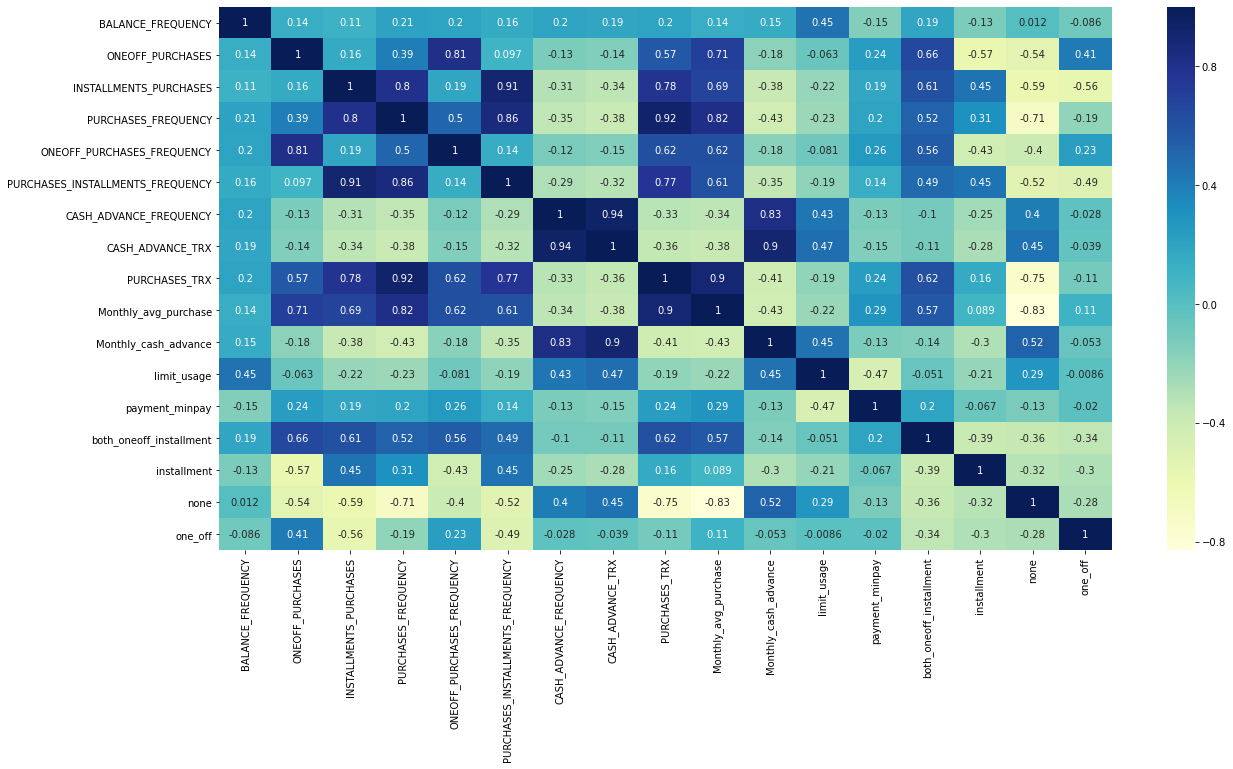

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(cr_dummy.corr(),annot=True,cmap="YlGnBu")

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

# d). Standardrizing data 
- To put data on the same scale 

In [52]:
from sklearn.preprocessing import  StandardScaler

In [53]:
sc=StandardScaler()

In [54]:
cr_dummy.shape

(8950, 17)

In [55]:
cr_scaled=sc.fit_transform(cr_dummy)

In [56]:
cr_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249]])

# e) Applying PCA 

In [57]:
from sklearn.decomposition import PCA

In [58]:
cr_dummy.shape

(8950, 17)

In [59]:
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [60]:
sum(cr_pca.explained_variance_ratio_)

0.9999999999999998

In [61]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [62]:
var_ratio

{2: 0.582643979396029,
 3: 0.7299379309512698,
 4: 0.8115442762351226,
 5: 0.8770555795291426,
 6: 0.9186492443512606,
 7: 0.9410925256030126,
 8: 0.9616114053683051,
 9: 0.9739787081990652,
 10: 0.9835896584630706,
 11: 0.9897248107341954,
 12: 0.9927550009135229,
 13: 0.995390756238543,
 14: 0.9979616898169592,
 15: 0.9996360473172953,
 16: 0.9999999999999998,
 17: 0.9999999999999998}

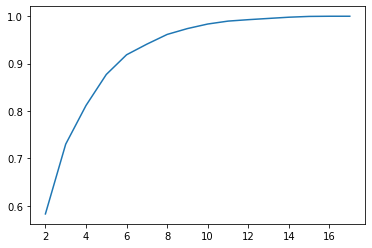

In [63]:
pd.Series(var_ratio).plot()

In [64]:
# Taking 6 Components as 91% variance is explained

pc=PCA(n_components=6)

In [65]:
p=pc.fit(cr_scaled)

In [66]:
cr_scaled.shape

(8950, 17)

In [67]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ,
       0.70717132])

In [68]:
np.sum(p.explained_variance_)

15.618782269308806

---
# Since 6 components are explaining about 91% variance so we select 6 components

---



In [69]:
cr_scaled.shape

(8950, 17)

In [70]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [71]:
dd=pd.DataFrame(reduced_cr)

In [72]:
dd.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


In [73]:
dd.shape

(8950, 6)

In [74]:
col_list=cr_dummy.columns

In [75]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [76]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


In [77]:
# Factor Analysis : variance explained by each component- 

pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

# f). Clustering 

---
<big>

Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

</big>

---

In [78]:
from sklearn.cluster import KMeans

In [79]:
km_4=KMeans(n_clusters=4,random_state=123)

In [80]:
km_4.fit(reduced_cr)
#km_4.labels_

KMeans(n_clusters=4, random_state=123)

In [81]:
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [82]:
pd.Series(km_4.labels_).value_counts()

2    2769
0    2224
1    2088
3    1869
dtype: int64

### Cluster Error

In [83]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(reduced_cr)
    cluster_errors.append(clusters.inertia_)

In [84]:
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors': cluster_errors } )

clusters_df

,num_clusters,cluster_errors
0,1,139772.482528
1,2,93307.526311
2,3,70745.678848
3,4,49446.078418
4,5,42548.718799
5,6,37713.299504
6,7,34290.828470
7,8,31507.336159
8,9,28603.134946
9,10,26318.737602


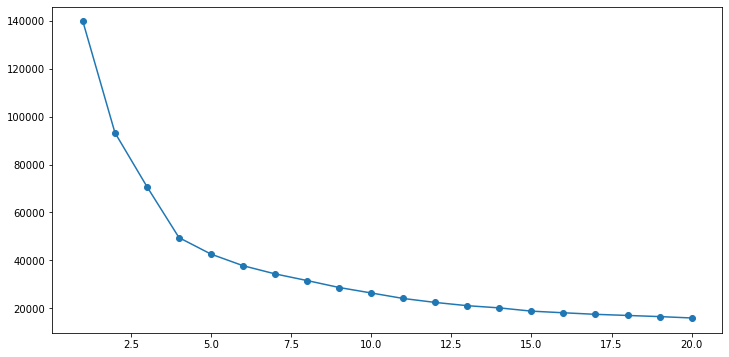

In [85]:
# Elbow Analysis

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

### Silhouette Coefficient

In [86]:
from sklearn import metrics

In [87]:
# calculate SC for K=2 through K=21
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [88]:
scores

[0.3311362838887829,
 0.3543181116120542,
 0.437085774396595,
 0.4312227676966945,
 0.4226353763133639,
 0.393585456759913,
 0.41805236796576234,
 0.38887744216754966,
 0.39345124058241815,
 0.36787721306485616,
 0.367000156240062,
 0.35132939794553275,
 0.3525965567774654,
 0.32956074855724704,
 0.33389461989573,
 0.33820715365121434,
 0.3354645505673165,
 0.33040681324630283,
 0.32159407885673585]

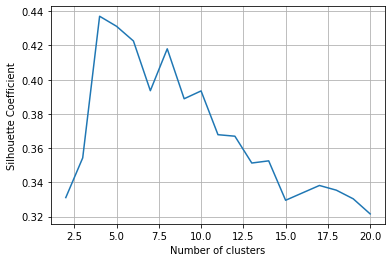

In [89]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Since 4 clusters giving us highest Silhouette Coefficient, hence choosing 4 clusters previously is a right choice.

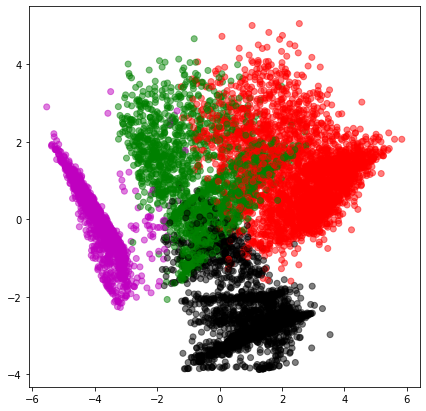

In [90]:
color_map={0:'k',1:'m',2:'r',3:'g'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [91]:
cr_dummy.dtypes

BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
limit_usage                         float64
payment_minpay                      float64
both_oneoff_installment               uint8
installment                           uint8
none                                  uint8
one_off                               uint8
dtype: object

In [92]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [93]:
df_pair_plot['Cluster']=km_4.labels_

In [94]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,0
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,3
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,3
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,3


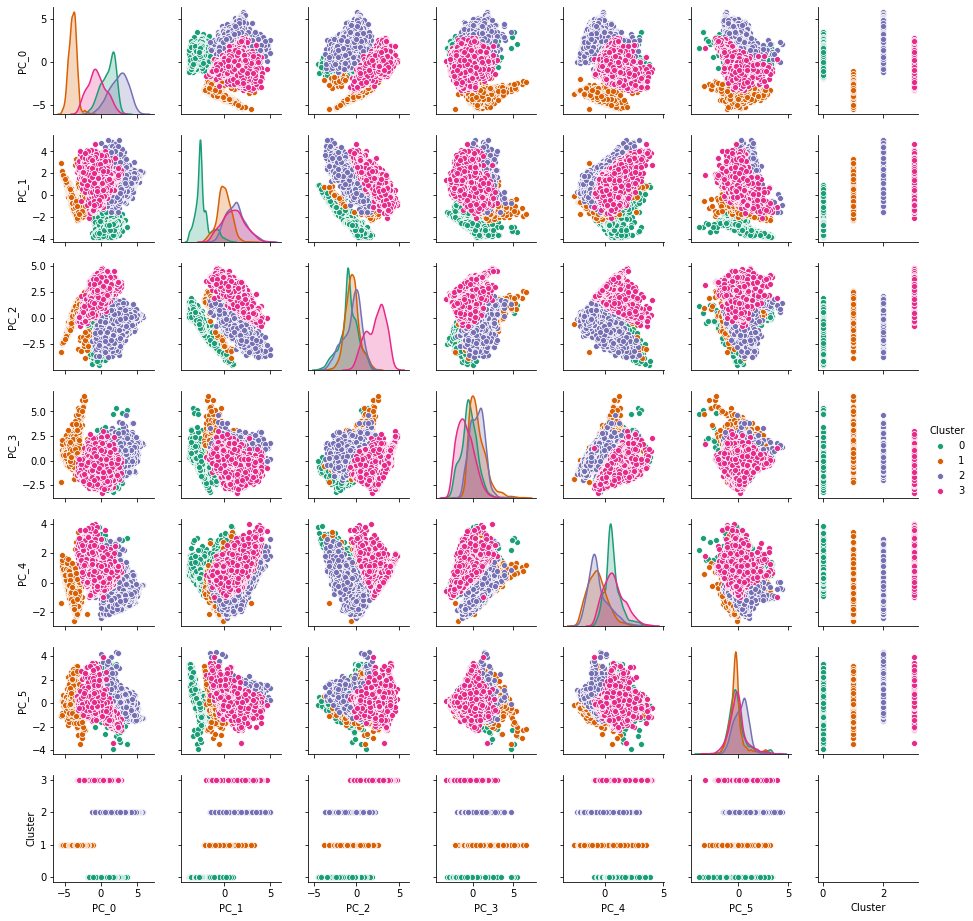

In [95]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

## It shows that first two components are able to indentify clusters

In [96]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [97]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [98]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [99]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,3
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,3
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,3


In [100]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster

cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.062050,0.043582,33.013723,7.127341
Monthly_avg_purchase,47.626256,0.148297,193.008043,69.875917
Monthly_cash_advance,33.550080,186.281319,67.466910,78.098613
limit_usage,0.264745,0.576076,0.353591,0.379761
CASH_ADVANCE_TRX,1.021133,6.540230,2.804261,2.881220
payment_minpay,13.422420,9.936617,7.245651,5.573672
both_oneoff_installment,0.000000,0.001916,1.000000,0.000535
installment,1.000000,0.017241,0.000000,0.000000
one_off,0.000000,0.002874,0.000000,0.999465
none,0.000000,0.977969,0.000000,0.000000


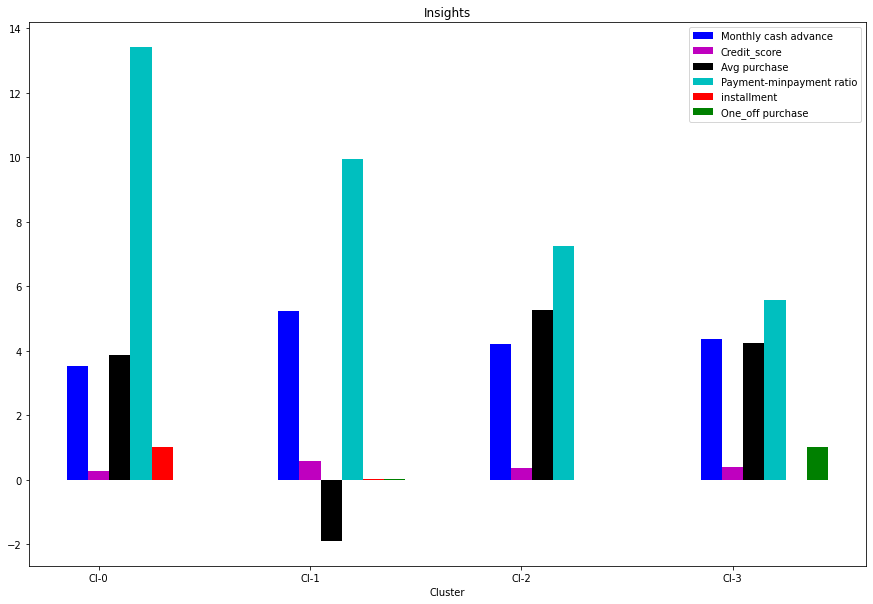

In [101]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

 ---
 **Insights**

# Clusters are clearly distinguishing behavior within customers

---

<big>



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 3 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21% of the total customer base ***



- Cluster 0 ustomers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



# Findings through clustering is validating Insights dervied from KPI. (as shown above in Insights from KPI
---

In [102]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print(s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print('Cluster -4','\n')
print(pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')

Cluster_4   
0          0    2224
1          1    2088
2          2    2769
3          3    1869
Name: Cluster_4, dtype: int64 

Cluster -4 

   Size  Percentage
0  2224   24.849162
1  2088   23.329609
2  2769   30.938547
3  1869   20.882682 



# Finding behaviour with 5 Clusters:
---

In [103]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([3, 0, 1, ..., 3, 0, 1])

In [104]:
pd.Series(km_5.labels_).value_counts()

3    2147
0    2082
2    1977
1    1862
4     882
dtype: int64

Text(0, 0.5, 'PC_1')

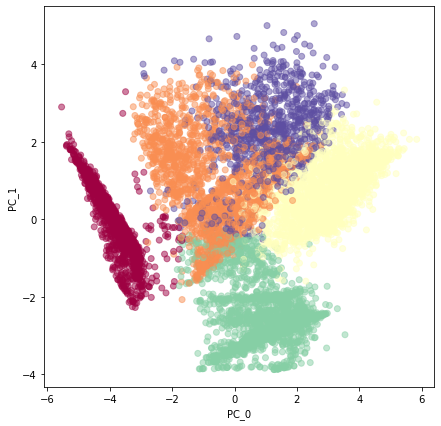

In [105]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [106]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [107]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,0.033141,7.096670,34.587759,11.910107,27.685941
Monthly_avg_purchase,0.092654,68.917645,210.536468,47.400083,141.441791
Monthly_cash_advance,185.097327,74.517541,4.040708,20.477295,249.745380
limit_usage,0.576097,0.377959,0.258931,0.249543,0.600498
CASH_ADVANCE_TRX,6.449087,2.697637,0.152757,0.543083,10.384354
payment_minpay,9.959037,5.562287,8.675499,13.795305,3.648349
both_oneoff_installment,0.000000,0.002148,1.000000,0.000000,0.899093
installment,0.016330,0.000000,0.000000,1.000000,0.089569
one_off,0.002882,0.997852,0.000000,0.000000,0.011338
none,0.980788,0.000000,0.000000,0.000000,0.000000


# With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side


---
 
<big>

**So we don't have quite distinguishable characteristics with 5 clusters**

In [108]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print('\n',s1)


 Cluster_5   
0          0    2082
1          1    1862
2          2    1977
3          3    2147
4          4     882
Name: Cluster_5, dtype: int64


In [109]:
# percentage of each cluster


print('Cluster-5','\n')
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print( pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5 

   Size  Percentage
0  2082   23.262570
1  1862   20.804469
2  1977   22.089385
3  2147   23.988827
4   882    9.854749


# Finding behavior with 6 clusters

In [110]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([2, 0, 5, ..., 2, 0, 3])

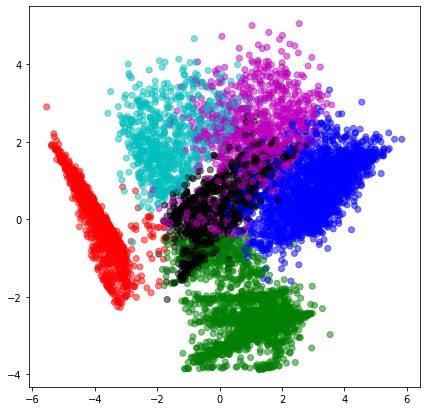

In [111]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [112]:
cluster_df_6=pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [113]:
six_cluster=cluster_df_6.groupby('Cluster_6')\
.apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,0.030347,34.666497,11.905537,5.962751,27.929224,7.760135
Monthly_avg_purchase,0.088891,211.232093,47.369817,53.851189,140.456682,78.685651
Monthly_cash_advance,184.829434,3.997955,20.636870,205.904868,242.378534,3.707133
limit_usage,0.575724,0.258202,0.250011,0.606912,0.599880,0.245802
CASH_ADVANCE_TRX,6.434971,0.148958,0.550489,7.654728,9.981735,0.130912
payment_minpay,9.976487,8.705868,13.783426,3.249987,3.622087,6.910361
both_oneoff_installment,0.000000,1.000000,0.000000,0.000000,0.912100,0.006757
installment,0.016378,0.000000,1.000000,0.000000,0.087900,0.000000
one_off,0.000000,0.000000,0.000000,1.000000,0.000000,0.993243
none,0.983622,0.000000,0.000000,0.000000,0.000000,0.000000


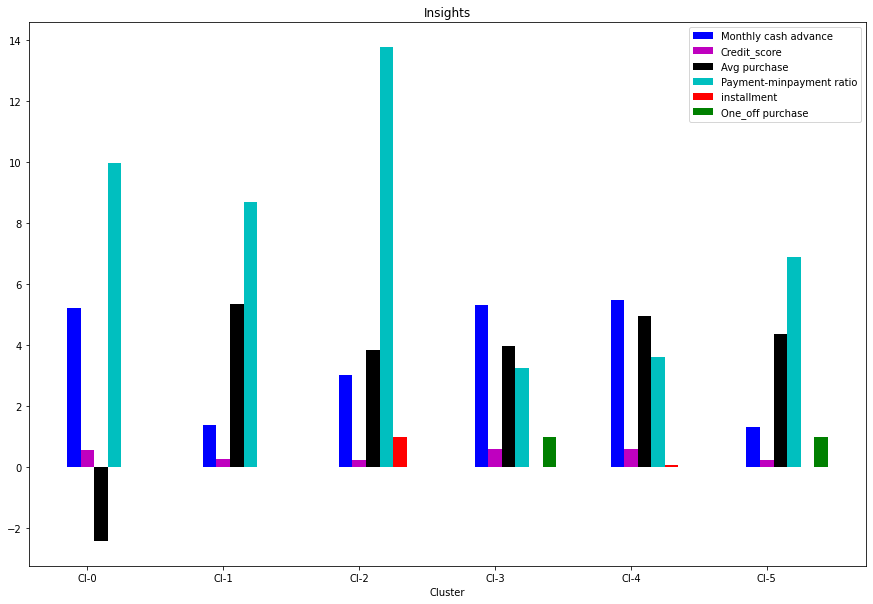

In [114]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['installment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [115]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([5.21943342, 1.38578303, 3.02707927, 5.32741426, 5.49050069,
       1.31025873])

## Insights with  6 clusters

- Here also groups are overlapping .
     - Cl-1 and Cl-5 behaving same 


---


# Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [116]:
from sklearn.metrics import silhouette_score

In [117]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
#     score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

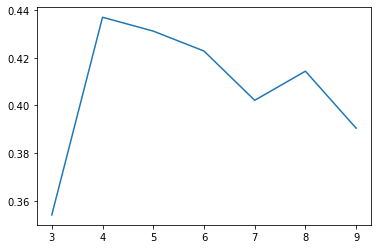

In [118]:
pd.Series(score).plot()

## Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.




<big>
    
**Insights with 4 Clusters**



---

<big>



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 3 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side *** This group is about 21% of the total customer base ***



- Cluster 0 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



# Marketing Strategy Suggested:

## a. Group 2
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
## b. Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
## c. Group 3
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
## d. Group 0
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       

---